# SENTIMENTAL ANALYSIS

### In this project, we aim to predict the sentiment behind a text using natural language processing.

## Importing Libraries and data:

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [274]:
# Read in data
df = pd.read_csv('sd_card.csv')
print(df.shape)
df = df.head(1000)
print(df.shape)

(4520, 3)
(1000, 3)


In [275]:
# Taking a look at our data:
df.head()

,Unnamed: 0,review_content,rating
0,0,Blazingly fast for a memory card.See speed -...,5.0 out of 5 stars
1,1,totally worst experience from amazon.1st one...,1.0 out of 5 stars
2,2,"After usage of 8 month, the card got write p...",1.0 out of 5 stars
3,3,This is genuine Samsung Microsd card manufac...,5.0 out of 5 stars
4,4,Simply mind blowing product .. flawlessly re...,5.0 out of 5 stars


In [276]:
df.dtypes

Unnamed: 0         int64
review_content    object
rating            object
dtype: object

In [277]:
df.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [278]:
df.columns

Index(['Unnamed: 0', 'review_content', 'rating'], dtype='object')

## Data Preprocessing:

In [279]:
# Let's make the data in a way that is suitable to use
# Checking for null values
df.isnull().sum()

Unnamed: 0        0
review_content    0
rating            0
dtype: int64

In [280]:
df.rename(columns = {'Unnamed: 0':'Id', 'review_content':'Reviews','rating':'Rating'}, inplace = True)
df["Id"] = df["Id"] + 1

In [281]:
# Checking dataframe after renaming columns:
df.head()

,Id,Reviews,Rating
0,1,Blazingly fast for a memory card.See speed -...,5.0 out of 5 stars
1,2,totally worst experience from amazon.1st one...,1.0 out of 5 stars
2,3,"After usage of 8 month, the card got write p...",1.0 out of 5 stars
3,4,This is genuine Samsung Microsd card manufac...,5.0 out of 5 stars
4,5,Simply mind blowing product .. flawlessly re...,5.0 out of 5 stars


In [282]:
# Let's convert the rating column into a usable format:
new = df["Rating"].str.split(" ", n = 1, expand = True)
df["Rating"]=new[0]
df['Rating'] = df['Rating'].astype(str).astype(float)
df['Rating'] = df['Rating'].astype('int')
df.dtypes

Id          int64
Reviews    object
Rating      int64
dtype: object

In [283]:
df.head()

,Id,Reviews,Rating
0,1,Blazingly fast for a memory card.See speed -...,5
1,2,totally worst experience from amazon.1st one...,1
2,3,"After usage of 8 month, the card got write p...",1
3,4,This is genuine Samsung Microsd card manufac...,5
4,5,Simply mind blowing product .. flawlessly re...,5


## Data Visualization

In [284]:
# Let's visualize the dataframe using python libraries:

In [285]:
df['Reviews'] = df['Reviews'].str.lower()
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]', '')# Punctuations
df['Reviews'] = df['Reviews'].str.replace('\d', '')# Numbers

<ipython-input-285-9d04b26ae2a3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('[^\w\s]', '')# Punctuations
<ipython-input-285-9d04b26ae2a3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('\d', '')# Numbers


In [286]:
df.head()

,Id,Reviews,Rating
0,1,blazingly fast for a memory cardsee speed i...,5
1,2,totally worst experience from amazonst one w...,1
2,3,after usage of month the card got write pro...,1
3,4,this is genuine samsung microsd card manufac...,5
4,5,simply mind blowing product flawlessly reco...,5


In [287]:
from wordcloud import WordCloud,STOPWORDS 
stopwords = set(STOPWORDS)
comment_words = " "

In [288]:
for val in df.Reviews:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words = comment_words +" ".join(tokens)+" "

In [289]:
wordcloud = WordCloud(stopwords=stopwords,background_color="white",width=1000, height=900,min_font_size=20).generate(comment_words)

(-0.5, 999.5, 899.5, -0.5)

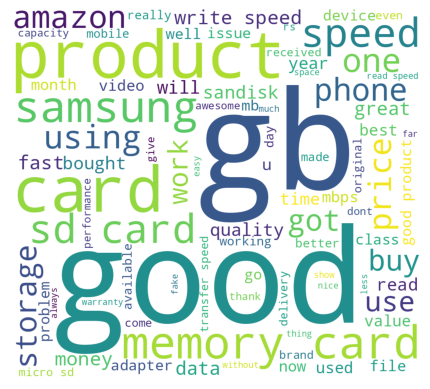

In [290]:
plt.imshow(wordcloud)
plt.axis("off")

In [291]:
df.dtypes
df.head()

,Id,Reviews,Rating
0,1,blazingly fast for a memory cardsee speed i...,5
1,2,totally worst experience from amazonst one w...,1
2,3,after usage of month the card got write pro...,1
3,4,this is genuine samsung microsd card manufac...,5
4,5,simply mind blowing product flawlessly reco...,5


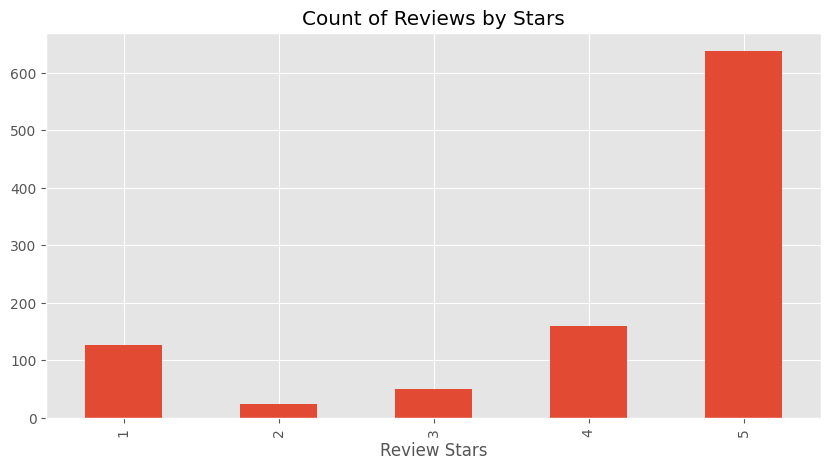

In [292]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

As we can see the 5 star ratings are much frequent than the other ratings. This is an unbalanced dataset. Training a model on this dataset will not produce a clear picture. To improve this we need to perform Feature Engineering.

## Feature Engineering:

One way to solve an imbalanced dataset is to downsample the majority class and Upsample the minority class.

In [293]:
from sklearn.utils import resample

majority_class = df[df['Rating'] == 5]  # Instances with 5-star ratings
minority_class = df[df['Rating'] != 5]  # Instances with ratings other than 5-star

# Downsample the majority class
downsampled_majority = resample(majority_class, replace=False, n_samples=len(minority_class))

# Upsample the minority class
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class))

# Combine the upsampled minority class and the downsampled majority class
balanced_df = pd.concat([downsampled_majority, upsampled_minority])

# Shuffle the balanced dataset if needed
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [294]:
df = balanced_df

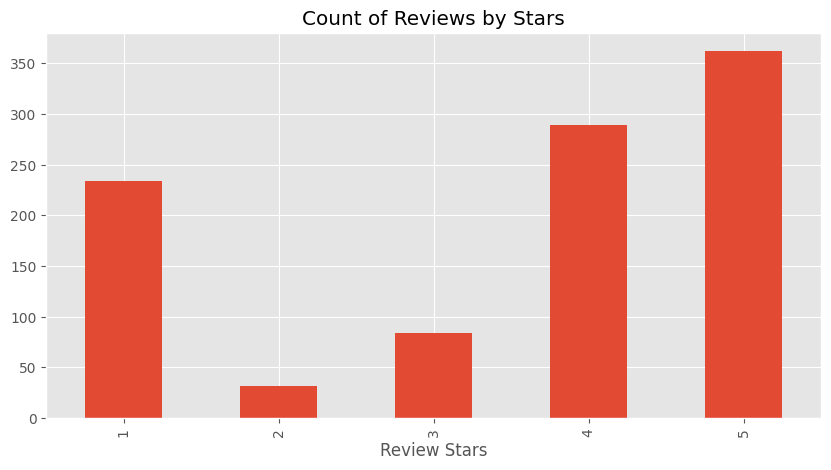

In [295]:
# Let's check the balanced dataset:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Sentimental Analysis:

Our dataframe is ready. To perform sentimental analysis we will be using two approaches:

## Approach 1: VADER Seniment Scoring.

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
1. Stop words are removed.
2. Each word is scored and combined to a total score.

In [296]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [297]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [298]:
# Let's test it:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [299]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [300]:
# Running the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Reviews']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [301]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [302]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Reviews,Rating
0,584,0.074,0.823,0.102,0.2617,i bought this for higher speed but when i ch...,3
1,584,0.074,0.823,0.102,0.2617,i bought this for higher speed but when i ch...,3
2,584,0.074,0.823,0.102,0.2617,i bought this for higher speed but when i ch...,3
3,584,0.074,0.823,0.102,0.2617,i bought this for higher speed but when i ch...,3
4,584,0.074,0.823,0.102,0.2617,i bought this for higher speed but when i ch...,3


## Plot Vader results:

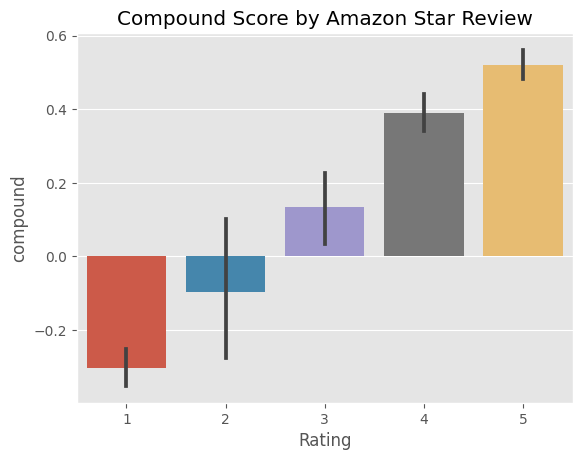

In [303]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

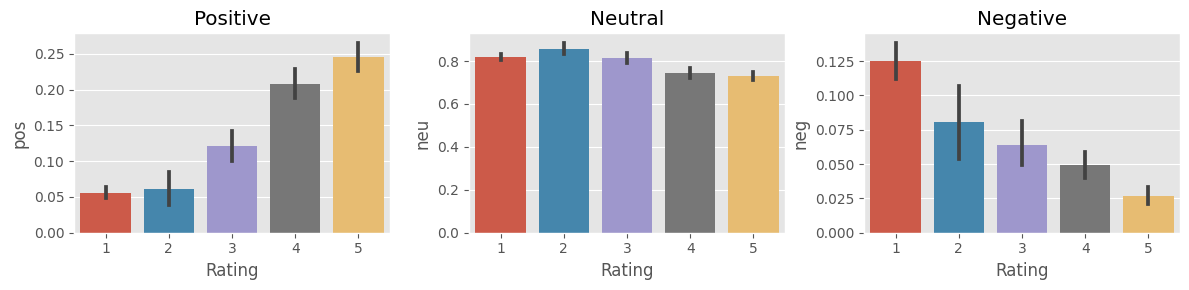

In [304]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Approach 2: Roberta Pretrained Model

Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words. It can even detect sarcasm!

In [305]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [306]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [307]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [308]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [309]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Reviews']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

In [310]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [311]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Reviews', 'Rating'],
      dtype='object')

## Plot RoBERTa results

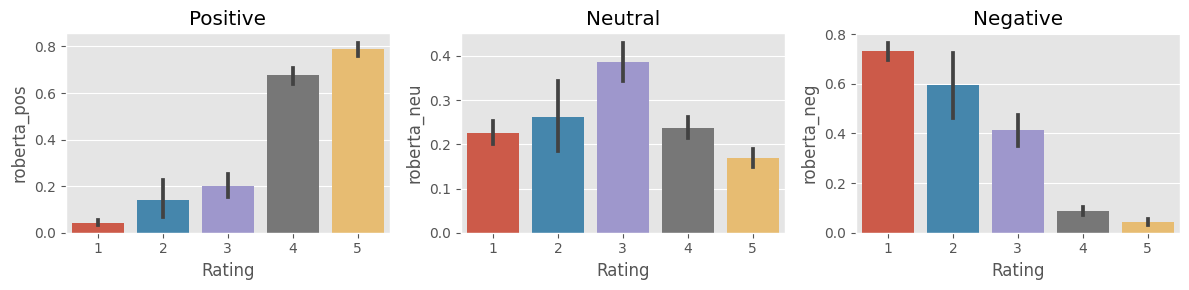

In [312]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=results_df, x='Rating', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='Rating', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='Rating', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Combining and Comparing:

In [313]:
results_df.head(10)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Reviews,Rating
0,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3
1,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3
2,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3
3,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3
4,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3
5,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1
6,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1
7,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1
8,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1
9,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1


In [314]:
results_df.shape

(1000, 10)

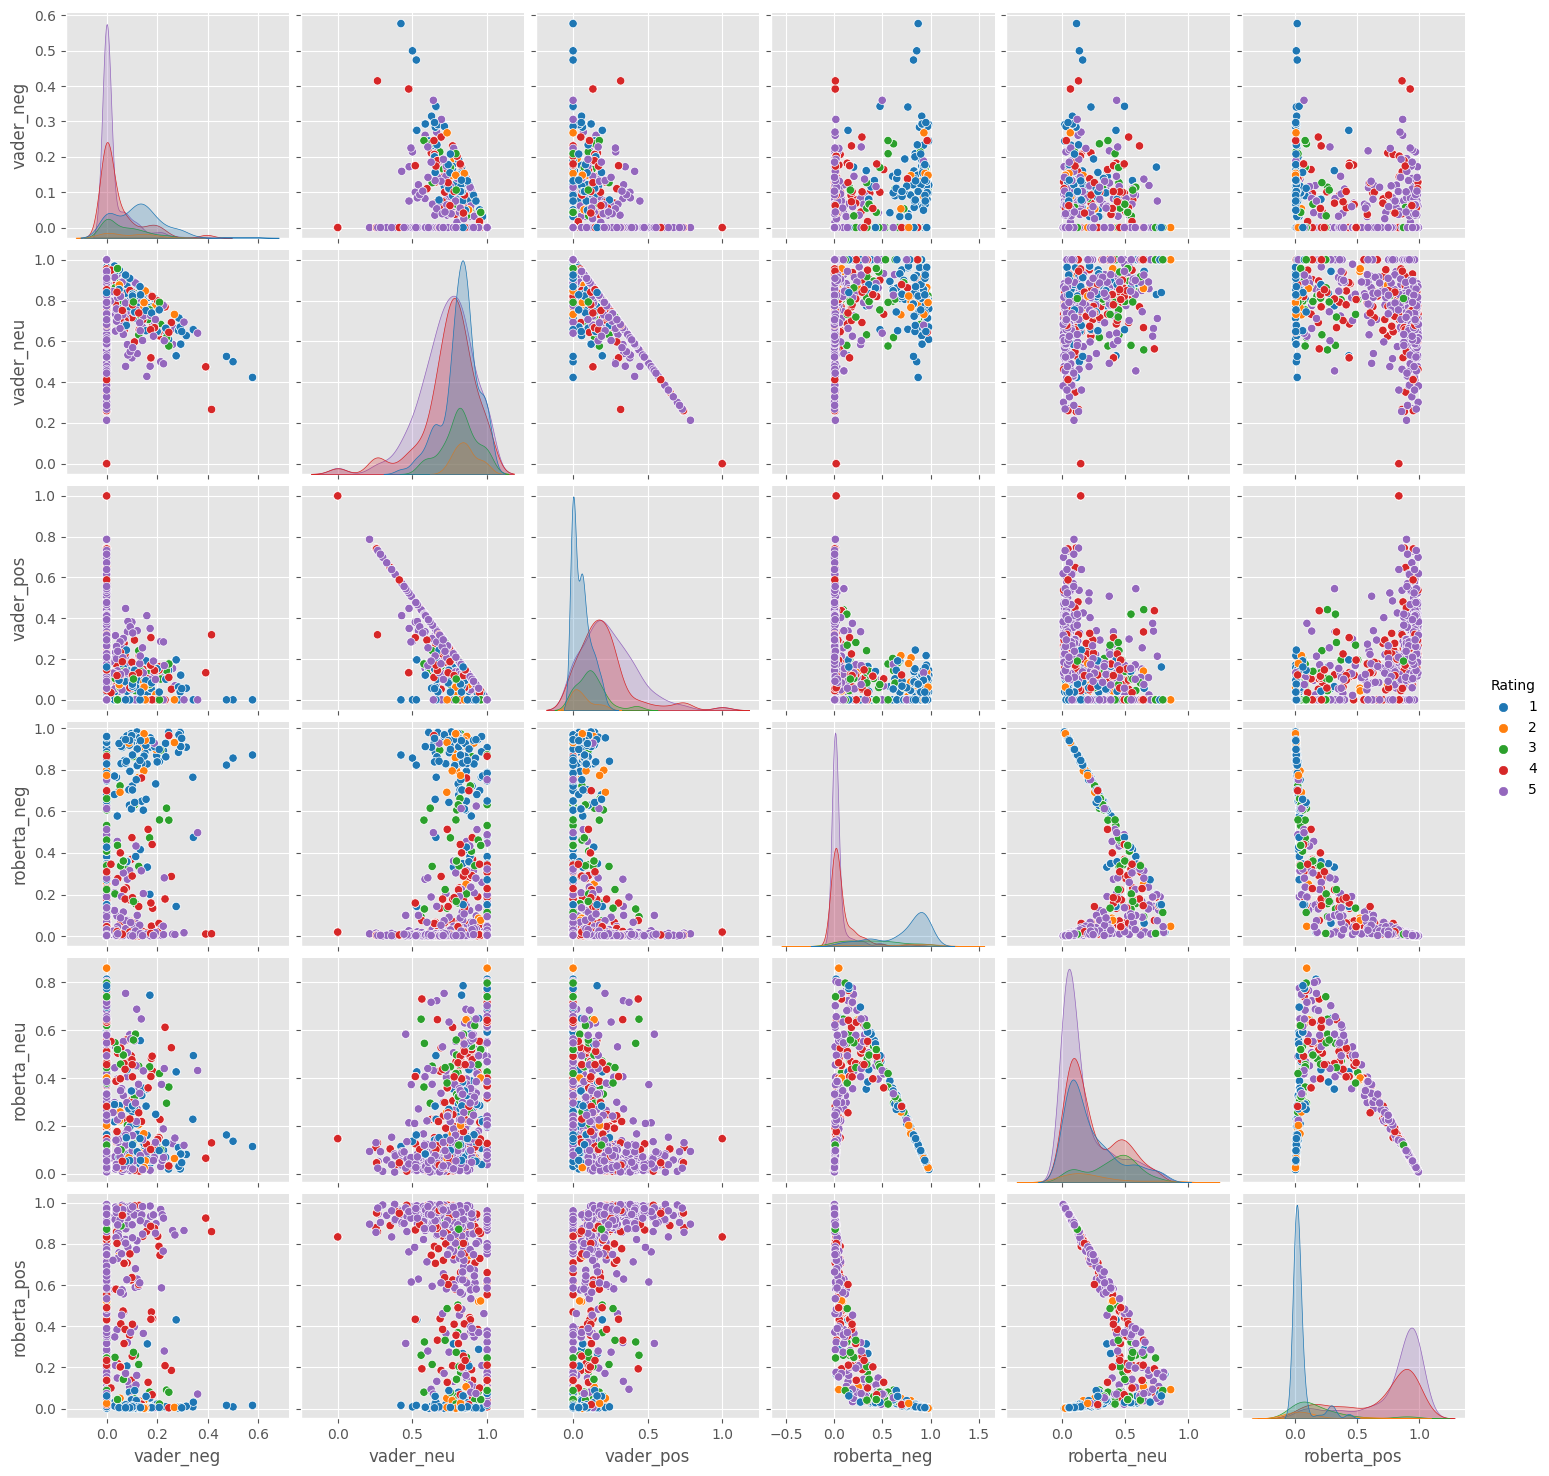

In [315]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

## Approach 3: The Transformers pipeline

In [316]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [317]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [318]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

## Text Classification:

### Let's create a column which classifies the text into positive, negative and neutral based on the roberta scores as it is the better model. 

In [319]:
# Define the threshold for classification
threshold = 0.5

# Function to classify the sentiment based on the scores
def classify_sentiment(row):
    pos_score = row['roberta_pos']
    neu_score = row['roberta_neu']
    neg_score = row['roberta_neg']

    if pos_score >= threshold:
        return 'Positive'
    elif neg_score >= threshold:
        return 'Negative'
    else:
        return 'Neutral'

In [320]:
example = "This is ok."
roberta_result = polarity_scores_roberta(example)
verdict=classify_sentiment(roberta_result)
print(verdict)

Positive


In [321]:
# Apply sentiment classification to the DataFrame
results_df['Sentiment'] = results_df.apply(classify_sentiment, axis=1)
results_df.head(50)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Reviews,Rating,Sentiment
0,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3,Neutral
1,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3,Neutral
2,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3,Neutral
3,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3,Neutral
4,584,0.074,0.823,0.102,0.2617,0.342717,0.481709,0.175574,i bought this for higher speed but when i ch...,3,Neutral
5,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1,Negative
6,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1,Negative
7,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1,Negative
8,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1,Negative
9,412,0.209,0.791,0.000,-0.6486,0.839946,0.151155,0.008899,i got wrong product instead of samsung i got...,1,Negative


In [322]:
filtered_rows = results_df[results_df['Rating'] == 3]
sentiment_values = filtered_rows['Sentiment'].values

for sentiment in sentiment_values:
    print(sentiment)

Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
Positive
Positive
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Positive
Neutral


## Predicting Rating from Review Scores:

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X = results_df[['roberta_pos','roberta_neu','roberta_neg','vader_neg','vader_neu','vader_pos','vader_compound']]  # Input features: positive, neutral, and negative scores
y = results_df['Rating']  # Target variable: actual ratings

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier model
modeltwo = RandomForestClassifier()

# Train the model on the training data
modeltwo.fit(X_train, y_train)

# Make predictions on the test data
y_pred = modeltwo.predict(X_test)

In [325]:
# Calculate the accuracy of the classification model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.825


In [326]:
def get_rating(example):
    # Calculating the RoBERTa and VADER scores for the text (replace with your scoring code)
    vaders = sia.polarity_scores(example)
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    roberta_neg = scores[0]
    roberta_neu = scores[1]
    roberta_pos = scores[2]
    vader_neg = vaders["neg"]
    vader_neu = vaders["neu"]
    vader_pos = vaders["pos"]
    vader_compound = vaders["compound"]
    if  roberta_pos >= 0.5:
        sentiment = 'Positive'
    elif roberta_neg >= 0.5:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    # Create input values as a dictionary
    input_values = {
        'roberta_pos': roberta_pos,
        'roberta_neu': roberta_neu,
        'roberta_neg': roberta_neg,
        'vader_neg': vader_neg,
        'vader_neu': vader_neu,
        'vader_pos': vader_pos,
        'vader_compound': vader_compound
        }
    # Convert the input values to a list of lists
    input_values_list = [list(input_values.values())]
    predicted_rating = modeltwo.predict(input_values_list)[0]
    # return predicted_rating, sentiment
    print("The predicted rating is:",predicted_rating,"and sentiment is",sentiment)

In [327]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [328]:
example = "This is very bad."
get_rating(example)

The predicted rating is: 1 and sentiment is Negative


In [329]:
example = "This is ok.not so great."
get_rating(example)

The predicted rating is: 3 and sentiment is Negative


In [330]:
example = "This is great."
get_rating(example)

The predicted rating is: 5 and sentiment is Positive


# THE END